In [ ]:
# jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10

In [11]:
import csv

reviews=[]
for row in csv.reader(open('C:\\Users\\Hassan\\Desktop\\bbcurdu.csv', encoding = "utf-8")):
    reviews.append(row)
#reviews = reviews[1:]  #This command removes the first row of the file as it only contains label(Heading)
#(reviews[:10])

In [12]:
import spacy
from spacy.lang.ur import Urdu
parser = Urdu()
from spacy.lang.ur.stop_words import STOP_WORDS
import nltk
stopwords = set(nltk.corpus.stopwords.words('urdu'))
#nltk.download('wordnet')
from nltk.corpus import wordnet as wn
import lemma

def tokenize(text):
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        elif token.like_url:
            lda_tokens.append('URL')
        elif token.text.isdigit():
            lda_tokens.append('NUM')
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens

def get_lemma(word):
    word = lemma.lemmatize(word)
    return word

final=[]     #In this list all of our pre processed data will be stored
for line in reviews:  #Break sentence into list words
    for words in line:
        tokens = tokenize(words)
        tokens = [token for token in tokens if len(token) > 3]
        tokens = [token for token in tokens if token not in stopwords]
        tokens = [get_lemma(token) for token in tokens]
        final.append(tokens)
#final[:10]

In [13]:
from gensim import corpora
dictionary = corpora.Dictionary(final)
print(dictionary)

Dictionary(1388 unique tokens: ['آفرید', 'احمد', 'ارشد', 'اسٹیڈیم', 'اشرف']...)


In [14]:
corpus = [dictionary.doc2bow(text) for text in final]
#print(corpus)

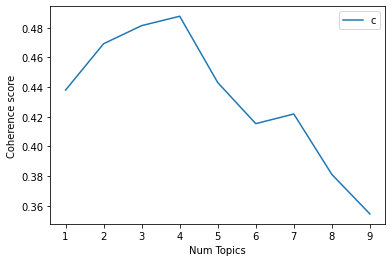

In [15]:
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=final, start=1, limit=10, step=1)
# Show graph
import matplotlib.pyplot as plt
limit=10; start=1; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

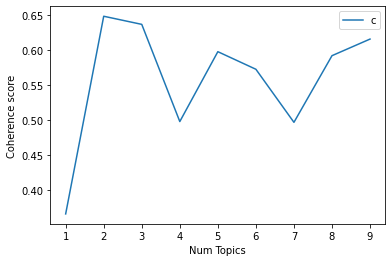

In [16]:
def compute_lsi_coherence_values(dictionary, corpus, texts, limit, start, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LSI topic models
    coherence_values : Coherence values corresponding to the LSI model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LsiModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

model_list, coherence_values = compute_lsi_coherence_values(dictionary=dictionary, corpus=corpus, texts=final, start=1, limit=10, step=1)
# Show graph
import matplotlib.pyplot as plt
limit=10; start=1; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

c:\users\hassan\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


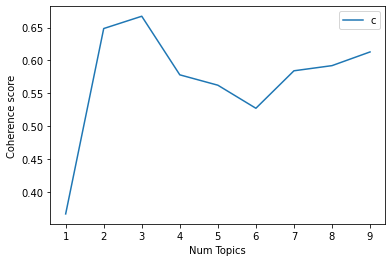

In [44]:
def compute_hdp_coherence_values(dictionary, corpus, texts, limit, start, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of HDP topic models
    coherence_values : Coherence values corresponding to the HDP model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=HdpModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

model_list, coherence_values = compute_lsi_coherence_values(dictionary=dictionary, corpus=corpus, texts=final, start=1, limit=10, step=1)
# Show graph
import matplotlib.pyplot as plt
limit=10; start=1; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [43]:
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
import time

t0= time.time()
ldamodel = LdaModel(corpus=corpus, num_topics=4, id2word=dictionary)
t1 = time.time() - t0
print("Time elapsed: ", t1)
ldamodel.show_topics()  

Time elapsed:  0.07697844505310059


c:\users\hassan\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.008*"پاکستان" + 0.006*"ڈراما" + 0.005*"میچز" + 0.005*"کراچی" + 0.005*"آپشن" + 0.004*"مرحلا" + 0.004*"مطابق" + 0.004*"کارکردگی" + 0.004*"کپتان" + 0.003*"کردار"'),
 (1,
  '0.009*"پاکستان" + 0.009*"کردار" + 0.009*"ڈراما" + 0.005*"بھارت" + 0.004*"مرحلا" + 0.004*"اداکار" + 0.004*"زلمی" + 0.004*"کھلاڑی" + 0.004*"کارکردگی" + 0.004*"پشاور"'),
 (2,
  '0.005*"تیار" + 0.004*"جاری" + 0.003*"سلطانز" + 0.003*"اسٹیڈیم" + 0.003*"آزمائش" + 0.003*"ڈسپلے" + 0.003*"رفتار" + 0.003*"ضرورت" + 0.003*"کنگز" + 0.003*"شامل"'),
 (3,
  '0.006*"کراچی" + 0.006*"کھلاڑی" + 0.005*"پولیس" + 0.005*"میچز" + 0.004*"اسٹیڈیم" + 0.004*"شامل" + 0.004*"اسٹوریج" + 0.004*"ٹیم" + 0.004*"لاہور" + 0.004*"مطابق"')]

In [ ]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)

In [35]:
# Compute Coherence Score using c_v
coherence_model_lda = CoherenceModel(model=ldamodel, texts=final, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

c:\users\hassan\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Coherence Score:  0.37791920114289623


In [36]:
# Compute Coherence Score using u_mass
coherence_model_lda = CoherenceModel(model=ldamodel, texts=final, dictionary=dictionary, coherence='u_mass')
coherence_lda_umass = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda_umass)


Coherence Score:  -8.932466925611632


c:\users\hassan\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
t0= time.time()
lsimodel = LsiModel(corpus=corpus, num_topics=4, id2word=dictionary)
t1 = time.time() - t0
print("Time elapsed: ", t1)
lsimodel.show_topics()

Time elapsed:  0.08809900283813477


[(0,
  '0.213*"کھلاڑی" + 0.182*"زلمی" + 0.177*"قلندرز" + 0.168*"میچز" + 0.163*"کارکردگی" + 0.162*"کپتان" + 0.161*"اسٹیڈیم" + 0.161*"پشاور" + 0.159*"کراچی" + 0.139*"سلطانز"'),
 (1,
  '-0.268*"ضرورت" + -0.248*"انڈسٹری" + -0.214*"مواد" + -0.177*"اداکار" + -0.168*"بھارت" + -0.158*"حکومت" + -0.156*"پاکستان" + -0.154*"فارم" + -0.154*"پلیٹ" + -0.149*"شوبز"'),
 (2,
  '0.168*"ضرور" + 0.158*"تیار" + -0.150*"جیتنے" + -0.147*"موقع" + 0.139*"بھرپور" + 0.127*"اچھ" + 0.124*"مداح" + -0.109*"آفریدی" + 0.108*"کھلاڑی" + 0.107*"میچز"'),
 (3,
  '0.384*"پاکستان" + 0.290*"ڈراما" + 0.224*"کردار" + 0.145*"مرحلا" + 0.137*"کرکٹر" + 0.133*"کارکردگی" + 0.132*"کرکٹ" + 0.129*"بھارت" + 0.128*"بولنگ" + 0.106*"لباس"')]

In [37]:
# Compute Coherence Score using c_v
coherence_model_lsi = CoherenceModel(model=lsimodel, texts=final, dictionary=dictionary, coherence='c_v')
coherence_lsi = coherence_model_lsi.get_coherence()
print('\nCoherence Score: ', coherence_lsi)

c:\users\hassan\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Coherence Score:  0.5679099217808


In [38]:
# Compute Coherence Score using u_mass
coherence_model_lsi = CoherenceModel(model=lsimodel, texts=final, dictionary=dictionary, coherence='u_mass')
coherence_lsi_umass = coherence_model_lsi.get_coherence()
print('\nCoherence Score: ', coherence_lsi_umass)


Coherence Score:  -3.5986331273992964


c:\users\hassan\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
t0= time.time()
hdpmodel = HdpModel(corpus=corpus, id2word=dictionary)
print("Time elapsed: ", t1)
hdpmodel.show_topics()

Time elapsed:  0.08809900283813477


c:\users\hassan\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.005*اداکار + 0.005*شکای + 0.005*ہارنا + 0.004*تیار + 0.004*پاکستان + 0.004*جیتنے + 0.004*غلطی + 0.004*بھارت + 0.004*آئی + 0.004*انڈسٹری + 0.003*ضرورت + 0.003*پہننا + 0.003*یونٹ + 0.003*ازاں + 0.003*صحیح + 0.003*مواد + 0.003*سیریل + 0.003*8فتوح + 0.003*معلوم + 0.003*چاول'),
 (1,
  '0.005*انکلوژرز + 0.004*کارکردگی + 0.004*کپتان + 0.004*سمجھت + 0.004*موقع + 0.004*8فتوح + 0.004*ٹائٹل + 0.003*مفید + 0.003*مشہور + 0.003*ہیں۔کراچ + 0.003*ٹیبل + 0.003*باصلاحیت + 0.003*کوالیفائر + 0.003*زلمی + 0.003*لہذا + 0.003*ہدای + 0.003*وقفا + 0.003*اعلیٰ + 0.003*ایمبولینس + 0.003*آفریدی'),
 (2,
  '0.005*کیریبیئن + 0.004*زلمی + 0.004*برتھ + 0.004*حریف + 0.004*یکسپریس + 0.004*کھلاڑی + 0.004*8کیچز + 0.004*خدشات + 0.003*روبی + 0.003*ثابت + 0.003*میچز + 0.003*جاننے + 0.003*ریاض + 0.003*تیار + 0.003*کہاکہ + 0.003*سرفہرست + 0.003*دکھائ + 0.003*لی۔کیون + 0.003*کیا،اس + 0.003*لاہور'),
 (3,
  '0.005*انتقال + 0.004*میچز + 0.004*متعلقہ + 0.004*ڈاکٹر + 0.004*کیمیائی + 0.004*فیصل + 0.004*کھلاڑی + 0.004*والد

In [39]:
# Compute Coherence Score using c_v
coherence_model_hdp = CoherenceModel(model=hdpmodel, texts=final, dictionary=dictionary, coherence='c_v')
coherence_hdp = coherence_model_hdp.get_coherence()
print('\nCoherence Score: ', coherence_hdp)

c:\users\hassan\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Coherence Score:  0.7195142682825402


In [40]:
# Compute Coherence Score using u_mass
coherence_model_hdp = CoherenceModel(model=hdpmodel, texts=final, dictionary=dictionary, coherence='u_mass')
coherence_hdp_umass = coherence_model_hdp.get_coherence()
print('\nCoherence Score: ', coherence_hdp_umass)


Coherence Score:  -21.800464013235057


c:\users\hassan\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


c:\users\hassan\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


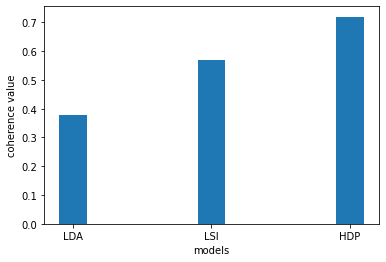

In [41]:
import numpy as np

def coherence_graph(coherence,label):
    assert len(coherence)==len(label)
    n=len(coherence)
    x=np.arange(n)
    plt.bar(x,coherence,width=0.2,tick_label=label,align='center')
    plt.xlabel('models')
    plt.ylabel('coherence value')

coherence_graph([coherence_lda,coherence_lsi,coherence_hdp],['LDA','LSI','HDP'])

In [ ]:
!python -m pip install -U pyLDAvis